In [1]:
# Dependencies and Setup
import pandas as pd
import requests
import gmaps
import openpyxl
import folium
import json
import gmaps.datasets
import numpy as np
import re
# from shapely.geometry import Point, Polygon
# import geopandas as gpd
# import descartes
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline
%matplotlib notebook

# Import API key
from config import g_map

# Configure gmaps
gmaps.configure(api_key=g_map)

# Bring in 2010 - Present Data

In [2]:
# 1. Read the Data_Columns_and_spills into a DataFrame. All sheets
# Unedited excel files
xlfile_2010 = pd.ExcelFile("../Resources/Data_columns_and_spills.xlsx", engine='openpyxl')
spill2010_df = xlfile_2010.parse('2010-Present') #'2010-Present' is the sheet name in the excel file
#spill2010_df is all data all columns

In [3]:
spill2010_df

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
0,2018-12-10,2018,20180382,32252,SUPPLEMENTAL FINAL,31130,DCP MIDSTREAM,370 17TH STREET SUITE 2500,DENVER,CO,...,SR. PIPELINE COMPLIANCE SPECIALIST,kdneden@dcpmidstream.com,979-242-6976,NaN,2019-06-07,JOHN PONTIOUS,MANAGER PIPELINE COMPLIANCE,405-605-3859,jdpontious@dcpmidstream.com,DCP CONTRACT LINE LOCATOR GUADALUPE VALDES PRO...
1,2020-11-06,2020,20200300,34501,ORIGINAL FINAL,32545,"DENBURY GULF COAST PIPELINES, LLC",5851 LEGACY CIRCLE SUITE 1200,PLANO,TX,...,REGULATORY COMPLIANCE SPECIALIST,chad.docekal@denbury.com,972-673-2734,NaN,2020-11-06,DAVID SHEPPARD,SENIOR VICE PRESIDENT - OPERATIONS,972-673-2038,david.sheppard@denbury.com,"ON 10/7/2020 AT 17:31, DENBURY BEGAN BLOWDOWN ..."
2,2015-02-24,2015,20150071,21327,SUPPLEMENTAL FINAL,31618,ENTERPRISE PRODUCTS OPERATING LLC,1100 LOUISIANA STREET,HOUSTON,TX,...,SR. COMPLIANCE SPECIALIST,mjpavlak@eprod.com,713-381-5897,NaN,2016-04-21,MICHAEL PAVLAK,SR. COMPLIANCE SPECIALIST,713-381-5897,mjpavlak@eprod.com,AT APPROXIMATELY 9:40 A.M. C.S.T. ON JANUARY 2...
3,2020-09-13,2020,20200253,35187,SUPPLEMENTAL,2552,COLONIAL PIPELINE CO,1185 SANCTUARY PARKWAY SUITE 100,ALPHARETTA,GA,...,MANAGER - PIPELINE COMPLIANCE,mpiazza@colpipe.com,678-763-5911,NaN,2021-04-17,MARK PIAZZA,MANAGER - PIPELINE COMPLIANCE,678-763-5911,mpiazza@colpipe.com,"ON 8/14/2020 AT 18:20, A COLONIAL EMPLOYEE WAS..."
4,2015-02-06,2015,20150040,20630,SUPPLEMENTAL FINAL,31618,ENTERPRISE PRODUCTS OPERATING LLC,1100 LOUISIANA STREET,HOUSTON,TX,...,SR. PIPELINE COMPLIANCE SPECIALIST,wnburrell@eprod.com,713-381-3536,NaN,2015-07-29,NEAL BURRELL,SR. PIPELINE COMPLIANCE SPECIALIST,713-381-3536,wnburrell@eprod.com,"ON 1/10/2015 AT 20:45 HRS, PIPELINE CONTROL DI..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,2018-01-08,2017,20180006,23089,SUPPLEMENTAL FINAL,3445,DIXIE PIPELINE COMPANY LLC,1100 LOUISIANA ST.,HOUSTON,TX,...,PIPELINE COMPLIANCE ENGINEER,lswilliams@eprod.com,713-381-6748,NaN,2018-02-01,SUZIE DAVIS,COMPLIANCE MANAGER,713-381-5585,smdavis@eprod.com,PUMP SHUT DOWN DUE TO HIGH BEARING TEMPERATURE...
4636,2018-05-30,2018,20180156,30565,SUPPLEMENTAL FINAL,30829,ENTERPRISE CRUDE PIPELINE LLC,1100 LOUISIANA STREET,HOUSTON,TX,...,PIPELINE COMPLIANCE SENIOR ENGINEER,lswilliams@eprod.com,713-381-6748,NaN,2018-06-28,LEANN WILLIAMS,PIPELINE COMPLIANCE SENIOR ENGINEER,713-381-6748,lswilliams@eprod.com,"DURING TANK REPAIRS, CONTRACT EMPLOYEE REMOVED..."
4637,2019-01-03,2018,20190001,31424,ORIGINAL FINAL,39145,ENBRIDGE STORAGE (CUSHING) L.L.C.,5400 WESTHEIMER COURT,HOUSTON,TX,...,SR COMPLIANCE ANALYST,stacy.soine@enbridge.com,715-395-3620,NaN,2019-01-03,RON CARLBERG,SUPERVISOR US PIPELINE COMPLIANCE,715-395-3619,ron.carlberg@enbridge.com,"ON DECEMBER 4, 2018 AT APPROXIMATELY 20:10 CST..."
4638,2019-01-24,2018,20190021,33804,SUPPLEMENTAL FINAL,300,"PLAINS PIPELINE, L.P.","333 CLAY STREET, SUITE 1900",HOUSTON,TX,...,ERC COMPLIANCE SPECIALIST,nagonzalez@paalp.com,713-646-4376,NaN,2020-05-27,NGIABI GICUHI,ERC MGR DIRECTOR,713-646-4336,ngicuhi@paalp.com,"ON 08/28/2018 AT ~7:40 A.M., THE PRIMARY AND S..."


In [22]:
spill2010_df.columns

Index(['REPORT_RECEIVED_DATE', 'IYEAR', 'REPORT_NUMBER', 'SUPPLEMENTAL_NUMBER',
       'REPORT_TYPE', 'OPERATOR_ID', 'NAME', 'OPERATOR_STREET_ADDRESS',
       'OPERATOR_CITY_NAME', 'OPERATOR_STATE_ABBREVIATION',
       ...
       'PREPARER_TITLE', 'PREPARER_EMAIL', 'PREPARER_TELEPHONE',
       'PREPARER_FAX', 'PREPARED_DATE', 'AUTHORIZER_NAME', 'AUTHORIZER_TITLE',
       'AUTHORIZER_TELEPHONE', 'AUTHORIZER_EMAIL', 'NARRATIVE'],
      dtype='object', length=588)

## Create Bar Chart for Years (2010-Present)
### Groupby year

In [23]:
spill2010_per_yr = spill2010_df.groupby(['IYEAR']).count()['REPORT_NUMBER']
spill2010_per_yr

IYEAR
2010    350
2011    344
2012    366
2013    400
2014    455
2015    460
2016    420
2017    415
2018    405
2019    384
2020    333
2021    308
Name: REPORT_NUMBER, dtype: int64

In [24]:
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

<IPython.core.display.Javascript object>


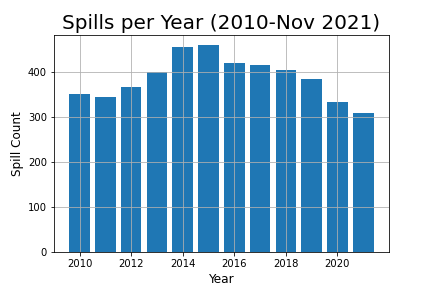

In [25]:
plt.bar(year, spill2010_per_yr)
plt.title("Spills per Year (2010-Nov 2021)", fontsize=20)
plt.ylabel("Spill Count", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(True)
# lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", 
#                  title="Spills")
# lgnd.legendHandles[0]._sizes = [75]
# lgnd.legendHandles[1]._sizes = [75]
# lgnd.legendHandles[2]._sizes = [75]
# lgnd.get_title().set_fontsize(12)

## Pie Chart of Causes 2010-Present

In [26]:
failure_count = spill2010_df.groupby(['CAUSE']).count()['REPORT_NUMBER']
failure_count

CAUSE
CORROSION FAILURE                    944
EQUIPMENT FAILURE                   2124
EXCAVATION DAMAGE                    165
INCORRECT OPERATION                  674
MATERIAL FAILURE OF PIPE OR WELD     310
NATURAL FORCE DAMAGE                 217
OTHER INCIDENT CAUSE                 114
OTHER OUTSIDE FORCE DAMAGE            91
Name: REPORT_NUMBER, dtype: int64

In [27]:
failure_modes = [
    'CORROSION FAILURE',
    'EQUIPMENT FAILURE',
    'EXCAVATION DAMAGE',
    'INCORRECT OPERATION',
    'MATERIAL FAILURE OF PIPE OR WELD',
    'NATURAL FORCE DAMAGE',
    'OTHER INCIDENT CAUSE',
    'OTHER OUTSIDE FORCE DAMAGE'
    ]

In [28]:
explode = [0, 0.2, 0, 0, 0, 0, 0, 0]
colors = ["red", "orange", "green", "lightcoral", "lightskyblue", "white", "purple", "cyan"]

<IPython.core.display.Javascript object>


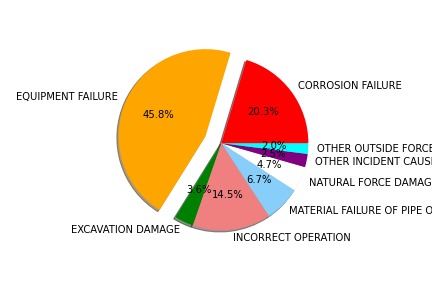

([<matplotlib.patches.Wedge at 0x19554e682c8>,
 [Text(0.8827719174300638, 0.6562878498013268, 'CORROSION FAILURE'),
  Text(-1.1845578644081238, 0.5355582749513498, 'EQUIPMENT FAILURE'),
  Text(-0.473769405283116, -0.9927449574879154, 'EXCAVATION DAMAGE'),
  Text(0.13486554816160112, -1.0917010964174538, 'INCORRECT OPERATION'),
  Text(0.7808404174597765, -0.7747827066095643, 'MATERIAL FAILURE OF PIPE OR WELD'),
  Text(1.002318203567805, -0.45316467072865296, 'NATURAL FORCE DAMAGE'),
  Text(1.0779736763578422, -0.2190268318712538, 'OTHER INCIDENT CAUSE'),
  Text(1.0979118684086184, -0.06774606414764602, 'OTHER OUTSIDE FORCE DAMAGE')],
 [Text(0.4815119549618529, 0.35797519080072365, '20.3%'),
  Text(-0.7289586857896144, 0.3295743230469844, '45.8%'),
  Text(-0.25841967560897233, -0.5414972495388628, '3.6%'),
  Text(0.07356302626996424, -0.5954733253186112, '14.5%'),
  Text(0.42591295497805987, -0.42260874905976226, '6.7%'),
  Text(0.5467190201278936, -0.24718072948835612, '4.7%'),
  Text(0

In [29]:
plt.pie(failure_count, explode=explode, labels=failure_modes,
       colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)

# Bring in 2002-2009 Data

In [30]:
# Read the Data_Columns_and_spills into a DataFrame. All sheets
# Unedited excel files
xlfile_2002 = pd.ExcelFile("../Resources/Data_columns_and_spills.xlsx", engine='openpyxl')
spill2002_df = xlfile_2002.parse('2002-2010') #'2002-2010' is the sheet name in the excel file
#spill2002_df is all data all columns

In [31]:
spill2002_df

,IYEAR,OPERATOR_ID,RPTID,OWNER_OPERATOR_ID,NAME,OPSTREET,OPCITY,OPCOUNTY,OPSTATE,OPZIP,...,IO_DRUG,IO_ALCO,MISC,UNKNOWN,UNKNOWN_TXT,PNAME,PTEL,PEMAIL,PFAX,NARRATIVE
0,2002,19237,20020037,NaN,"TE PRODUCTS PIPELINE CO., LP",2929 ALLEN PARKWAY,HOUSTON,HARRIS,TX,77019,...,NaN,NaN,NaN,NaN,NaN,JLYNN STOUT,7137593614,JPSTOUT@TEPPCO.COM,7.137594e+09,NaN
1,2002,25146,20020038,NaN,"EQUISTAR CHEMICALS, L.P.",PO BOX 1847,ALVIN,BRAZORIA,TX,77512,...,NaN,NaN,NaN,NaN,NaN,GREG LEBLANC,7138446942,GREGORY.LEBLANC@EQUISTARCHEM.COM,7.138447e+09,REGARDING PART C5: SECTIONS OF THIS LINE WERE...
2,2002,12628,20020039,NaN,MOBIL PIPELINE CO,800 BELL STREET,HOUSTON,HARRIS,TX,77002,...,0.0,0.0,NaN,NaN,NaN,STEVEN J ROBENOLT,7136562651,STEVEN.J.ROBENOLT@EXXONMOBIL.COM,7.136568e+09,"ON JANUARY 24,2002 MOBIL PIPELINE COMPANY INCU..."
3,2002,2731,20020040,NaN,CHEVRON PIPELINE CO,2811 HAYES ROAD,HOUSTON,HARRIS,TX,77082,...,NaN,NaN,NaN,NaN,NaN,R A THORPE,2815963571,RATHORPE@CHEVRONTEXACO.COM,2.815964e+09,NaN
4,2002,4472,20020041,NaN,"KINDER MORGAN ENERGY PARTNERS, L.P.","500 DALLAS ST, SUITE 1000",HOUSTON,HARRIS,TX,77002,...,NaN,NaN,NaN,NaN,NaN,JAIME A HERNANDEZ,7133699443,JAIME_HERNANDEZ@KINKDERMORGAN.COM,7.134954e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,2009,10012,20090382,NaN,NUSTAR PIPELINE OPERATING PARTNERSHIP L.P.,"7340 W. 21ST STREET N., SUITE 200",WICHITA,SEDGWICK,KS,67205,...,NaN,NaN,NaN,NaN,NaN,DANIEL J. TIBBITS,3167217056,DAN.TIBBITS@NUSTARENERGY.COM,3.167739e+09,NaN
3026,2007,32147,20090383,NaN,MARATHON PIPE LINE LLC,539 SOUTH MAIN STREET,FINDLAY,HANCOCK,OH,45840,...,0.0,0.0,NaN,NaN,NaN,MANDI KUHLMAN,4194214037,MMKUHLMAN@MARATHONPETROLEUM.COM,4.194214e+09,DURING INSTALLATION OF NEW 16” CONTROL VALVE A...
3027,2006,32147,20090384,NaN,MARATHON PIPE LINE LLC,539 SOUTH MAIN STREET,FINDLAY,HANCOCK,OH,45840,...,0.0,0.0,NaN,NaN,NaN,MANDI KUHLMAN,4194214037,MMKUHLMAN@MARATHONPETROLEUM.COM,4.194214e+09,"WHILE PREPARING TO INSTALL A NEW FABRICATION, ..."
3028,2009,32147,20090385,NaN,MARATHON PIPE LINE LLC,539 SOUTH MAIN STREET,FINDLAY,HANCOCK,OH,45840,...,NaN,NaN,RESIDUAL PRODUCT IN THE LINE IGNITED FOLLOWING...,NaN,NaN,MANDI KUHLMAN,4194214037,MMKUHLMAN@MARATHONPETROLEUM.COM,4.194214e+09,"FOLLOWING A NITROGEN PURGE, COLD CUTS WERE UTI..."


## Bar Graph Incidents per Year 2002-2009

In [32]:
spill2002_per_yr = spill2002_df.groupby(['IYEAR']).count()['RPTID']
spill2002_per_yr

IYEAR
2002    448
2003    432
2004    377
2005    369
2006    354
2007    332
2008    376
2009    342
Name: RPTID, dtype: int64

In [33]:
year = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]

<IPython.core.display.Javascript object>


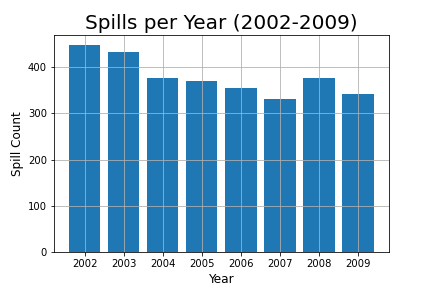

In [34]:
plt.bar(year, spill2002_per_yr)
plt.title("Spills per Year (2002-2009)", fontsize=20)
plt.ylabel("Spill Count", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(True)
# lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", 
#                  title="Spills")
# lgnd.legendHandles[0]._sizes = [75]
# lgnd.legendHandles[1]._sizes = [75]
# lgnd.legendHandles[2]._sizes = [75]
# lgnd.get_title().set_fontsize(12)

In [35]:
failure_count2002 = spill2002_df.groupby(['GEN_CAUSE_TXT']).count()['RPTID']
failure_count2002

GEN_CAUSE_TXT
CORROSION                         692
EQUIPMENT                        1041
EXCAVATION DAMAGE                 183
INCORRECT OPERATION               322
MATERIAL AND/OR WELD FAILURES     382
NATURAL FORCES                    162
OTHER                             169
OTHER OUTSIDE FORCE DAMAGE         75
Name: RPTID, dtype: int64

In [36]:
failure_modes2002 = [
    'CORROSION',
    'EQUIPMENT',
    'EXCAVATION DAMAGE',
    'INCORRECT OPERATION',
    'MATERIAL AND/OR WELD FAILURES',
    'NATURAL FORCES',
    'OTHER',
    'OTHER OUTSIDE FORCE DAMAGE'
    ]

In [37]:
explode = [0, 0.2, 0, 0, 0, 0, 0, 0]
colors = ["red", "orange", "green", "lightcoral", "lightskyblue", "white", "purple", "cyan"]

<IPython.core.display.Javascript object>


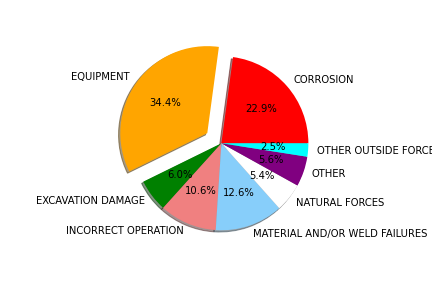

([<matplotlib.patches.Wedge at 0x19554cdc7c8>,
 [Text(0.8281209309016754, 0.72402743304556, 'CORROSION'),
  Text(-1.055044044775964, 0.7595275265471122, 'EQUIPMENT'),
  Text(-0.8778188747088103, -0.6628981997297612, 'EXCAVATION DAMAGE'),
  Text(-0.428063108076709, -1.0132926406047307, 'INCORRECT OPERATION'),
  Text(0.35768113894352643, -1.040223150503805, 'MATERIAL AND/OR WELD FAILURES'),
  Text(0.8588946373412688, -0.6872408616681712, 'NATURAL FORCES'),
  Text(1.0402232258529636, -0.35768091980989786, 'OTHER'),
  Text(1.0966670667302716, -0.08556485697541025, 'OTHER OUTSIDE FORCE DAMAGE')],
 [Text(0.4517023259463683, 0.39492405438848727, '22.9%'),
  Text(-0.6492578737082855, 0.4674015547982228, '34.4%'),
  Text(-0.4788102952957146, -0.3615808362162333, '6.0%'),
  Text(-0.23348896804184122, -0.5527050766934893, '10.6%'),
  Text(0.1950988030601053, -0.5673944457293482, '12.6%'),
  Text(0.4684879840043284, -0.3748586518190024, '5.4%'),
  Text(0.5673944868288892, -0.19509868353267154, '5.

In [38]:
plt.pie(failure_count2002, explode=explode, labels=failure_modes2002,
       colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)